# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0383 Зенин Пётр и Ханина Мария. Вариант №20.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** &ndash; сигнал, непрерывный по времени

**Дискретный сигнал** &ndash; сингал, дискретный по времени и непрерывный по значению

**Цифровой сигнал** &ndash; сигнал, дискретный по времени и значению

**Линейная комбинация** &ndash; Взвешанная сумма множества элементов.

**Гармонический сигнал** &ndash; $s(k) = A \cos(\omega k + \phi_0)$

**Среднее значение дискретного сигнала**: $\text{mean_s2} = \frac{\sum\limits_{k=0}^{N}{x(k)}}{N+1}$

**Энергия дискретного сигнал**: $\text{E} = \sum\limits_{k=0}^{N}{|x(k)|^2}$


**Средняя мощность дискретного сигнала**: $\text{P} = \frac{E}{t} = \frac{\sum\limits_{k=0}^{N}{|x(k)|^2}}{N+1}$

**Огибающая сигнала** &ndash; функция, описывающая изменения амплитуды сигнала во времени.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Вариант 20



In [4]:
#Импорт библиотек и задание переменных в соответствии с условием

import matplotlib.pyplot as plt
import numpy as np
from math import pi

Nb = 20

N = 30 + Nb % 5

a = (-1)**Nb*(0.8 + 0.005*(Nb %20))

C = 1 + Nb % 5

w0 = pi/(6 + Nb % 5)

U = Nb

n0 = 3 + Nb % 5

n_imp = 5 + Nb % 5

B1 = 1.5 + Nb % 5

B2 = 5.7 - Nb % 5

B3 = 2.2 + Nb % 5

w1 = pi/(4 + Nb % 5)

w2 = pi/(8 + Nb % 5)

w3 = pi/(16 + Nb % 5)

a1 = 1.5 - Nb % 5

a2 = 0.7 + Nb % 5

a3 = 1.4 + Nb % 5

#### **1. Смоделировать дискретный прямоугольный импульс:**

$$s_1(k) = \begin{cases}
U, \text{  } n_0 \leq k \leq n_0 + n_{imp} - 1\text{;}\\
0, \text{  иначе}
\end{cases}$$
на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времене $n \in [0, N-1]$. Пояснить как выполняется моделирование импульса.

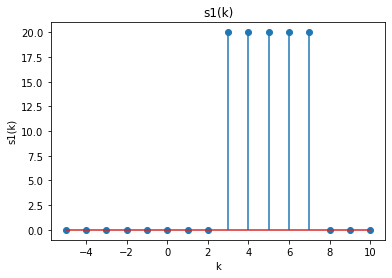

In [15]:
x_min = -5
x_max = 10

sigA = lambda t: np.where(t>=n0, 1, 0)
sigB = lambda t: np.where(t>=n0 + n_imp, 1, 0)

arr = np.arange(x_min, x_max+1, 1)
func = (sigA(arr) - sigB(arr)) * U

plt.stem(np.arange(x_min, x_max+1, 1), func, use_line_collection=True)
plt.title("s1(k)")
plt.xlabel("k")
plt.ylabel("s1(k)")
plt.show()

Пояснение:

Допустим, необходимо смоделировать дискретный прямоугольный импульс на основе дискретного единичного скачка $\sigma_d(k)$ так, чтобы импульс был с амплитудой U на отрезке $[A;B], \text{  } 0\geq A \geq B$

Рассмотрим аналоговый случай: $\chi(x)$

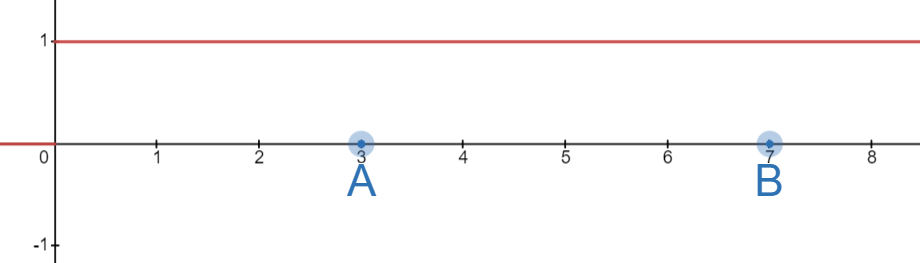

Для того, чтобы функция имела значение 0 на интервале $[B;+\infty]$ необходимо сделать следующее действие:

$$\chi(x) - \chi(x - B) \text{    (1)}$$

Тогда функция будет иметь следующий вид:

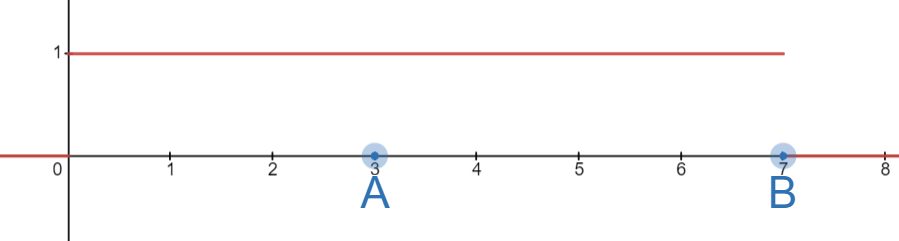

Теперь необходимо привести значения функции на отрезке $[0,A]$ к нулю. Можно заметить, что $\chi(x) - \chi(x-A) \text{    (2)}$ даст дискретный прямоугольный импульс на отрезке $[0,A]$.

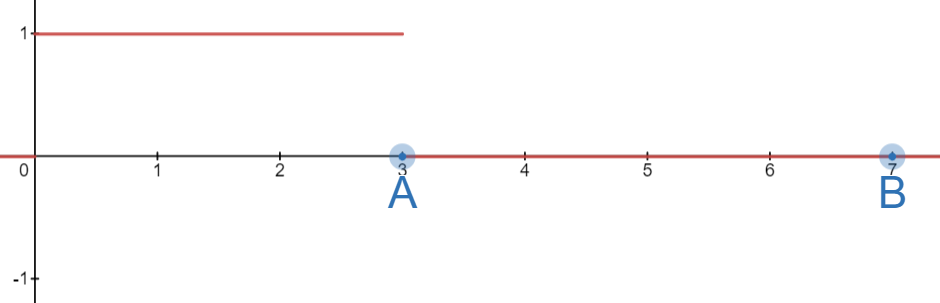

Теперь, если вычесть из формулы (1) формулу (2), получим искомый сигнал:

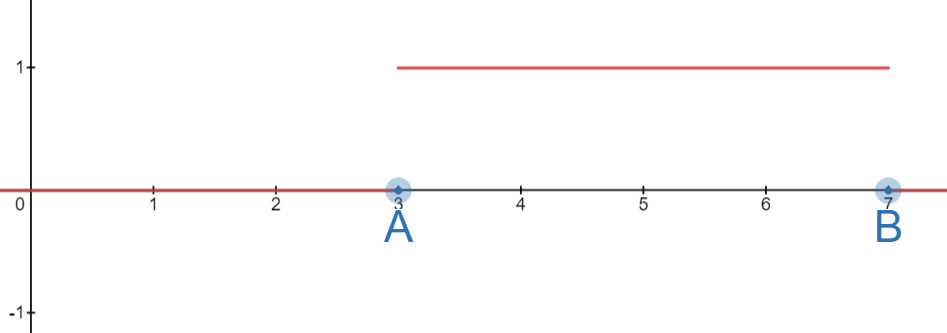

$$\chi(x) - \chi(x - B) - \chi(x) + \chi(x - A) = $$

$$ = \chi(x - A) - \chi(x - B)$$ 

С учётом амплитуды, дискретности и используемых переменных:

$$s_1(k) = U \cdot (\sigma_d(k - n_0) - \sigma_d(k - n_0 - n_{imp}))$$

#### 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k)$$, где
$$x_i(k) = B_isin(\hat{w}_ik), \text{  }i=1,2,3,\dots$$
с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$

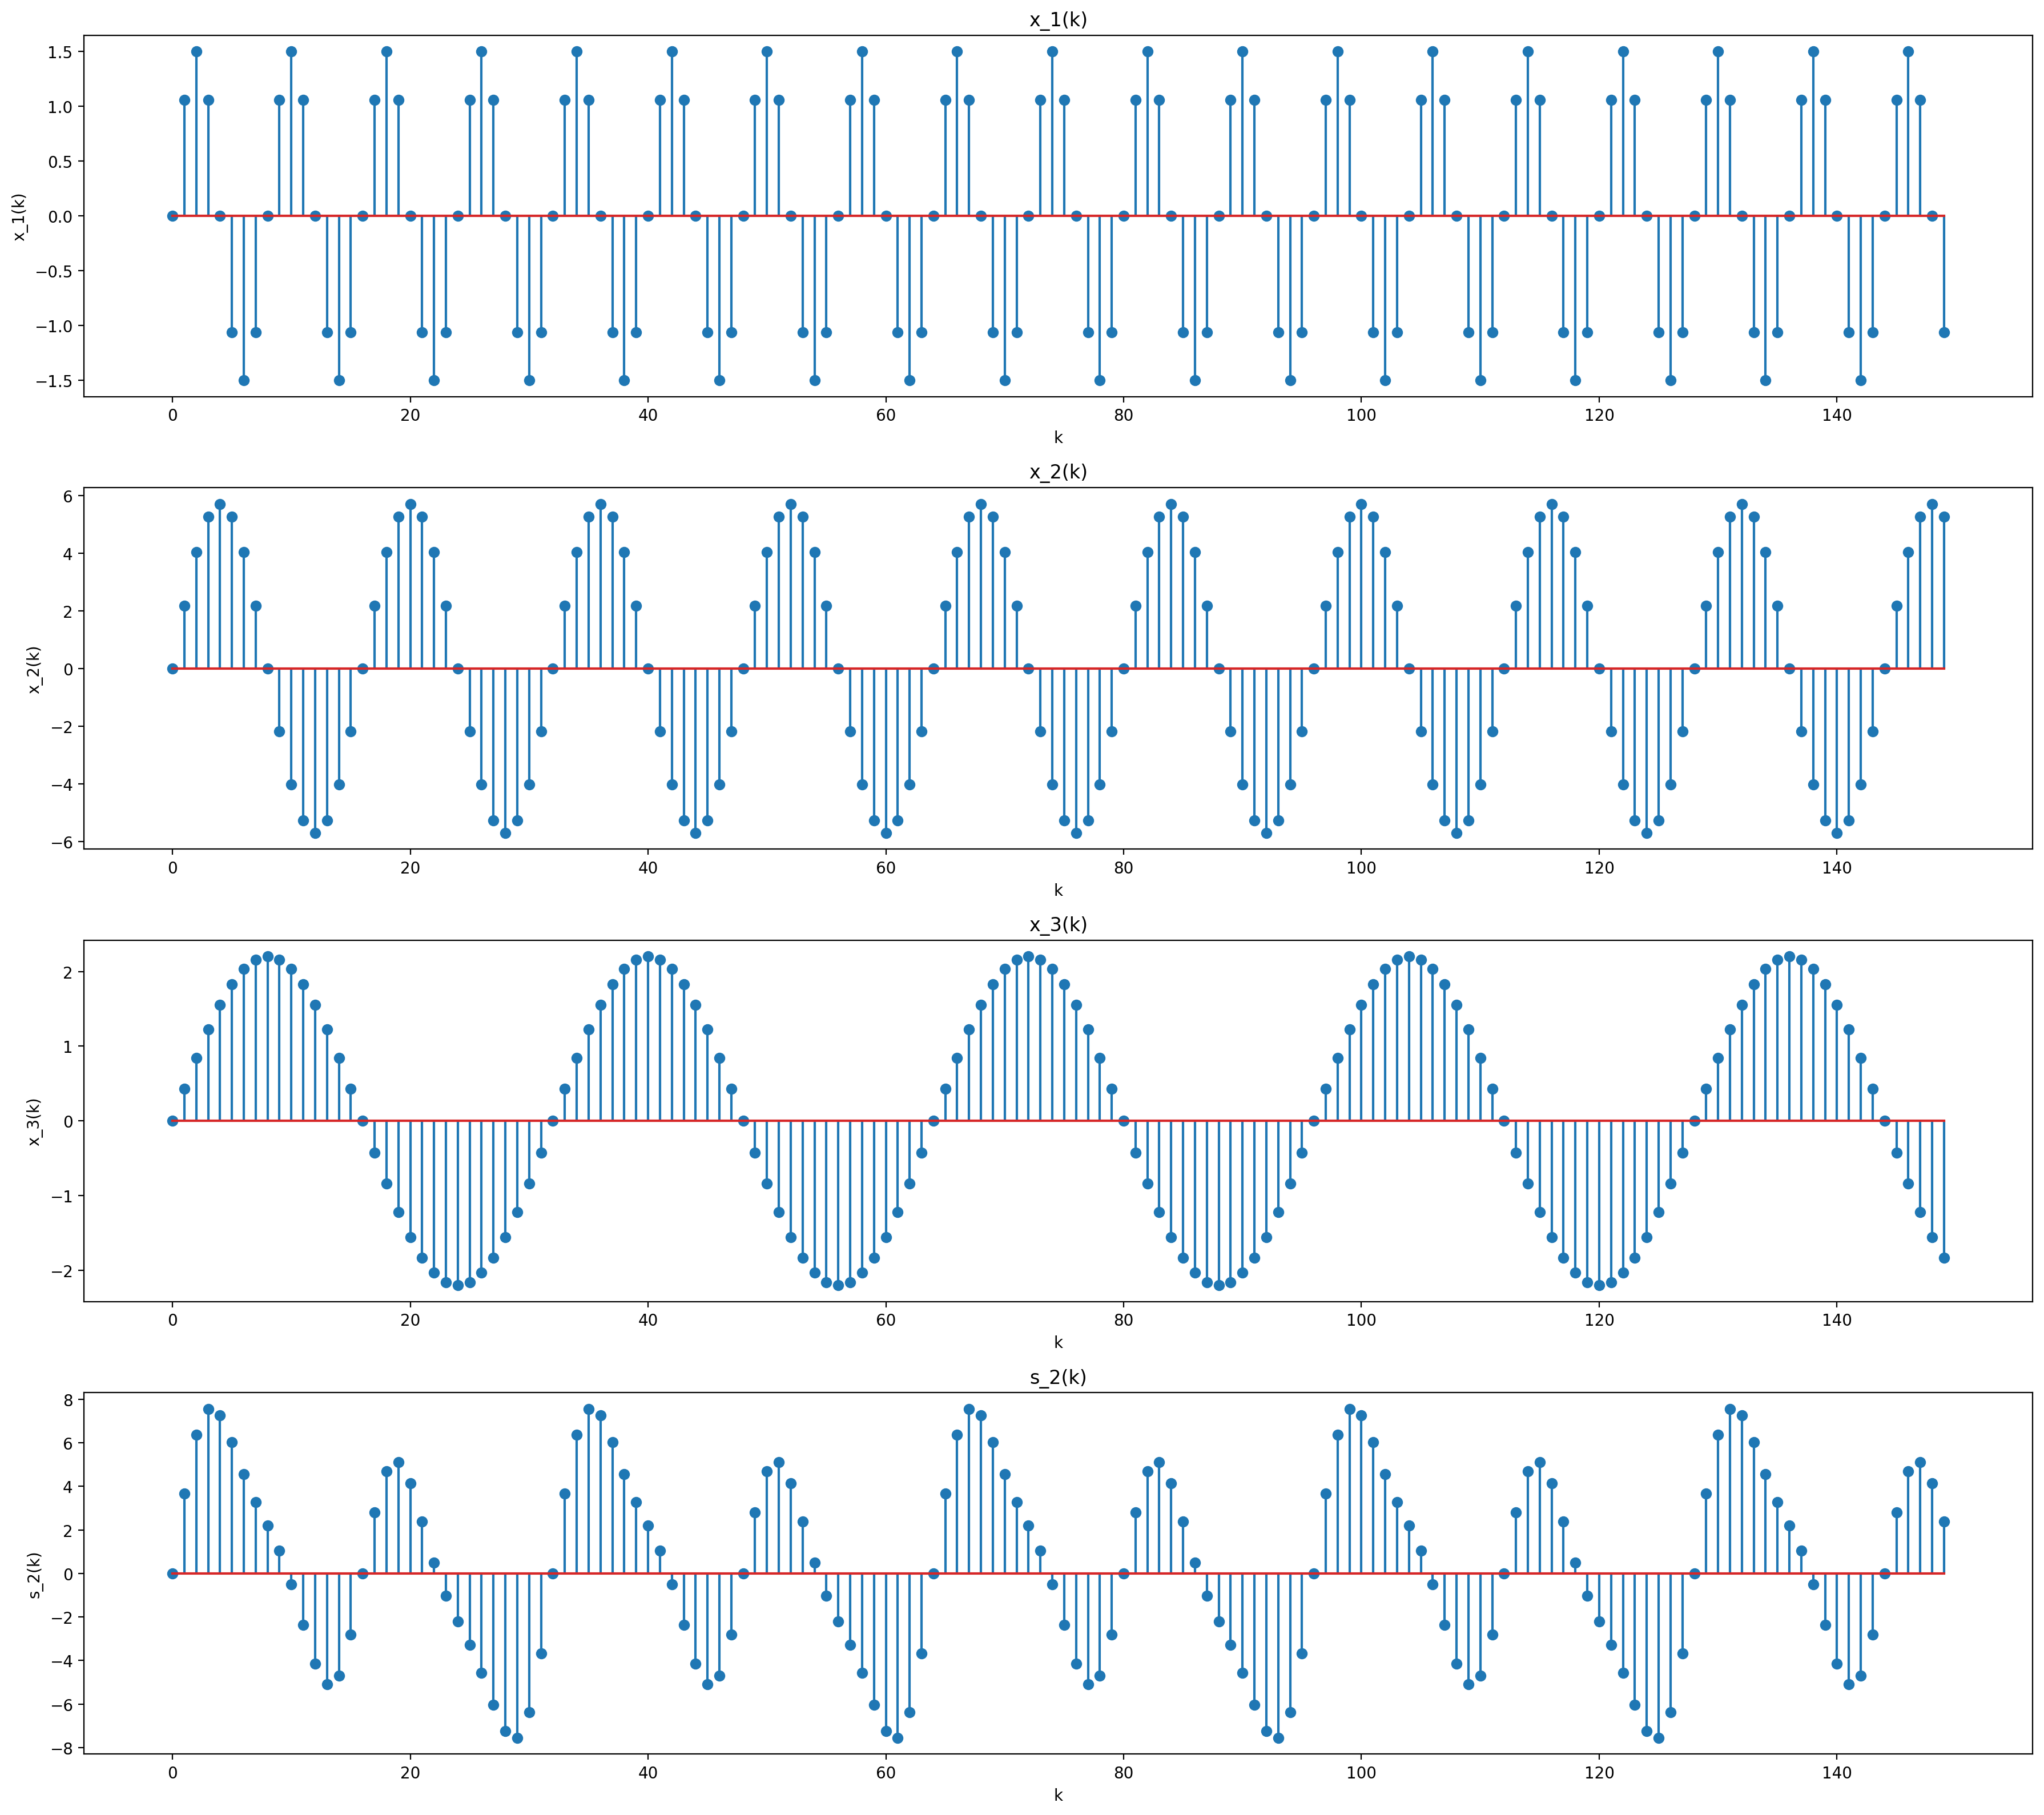

mean_s2: 0.27642294049622995
E: 2928.5329175551747
P: 19.523552783701163


In [29]:
x_1 = np.sin(np.arange(0,5*N - 1 + 1, 1)*w1)*B1
x_2 = np.sin(np.arange(0,5*N - 1 + 1, 1)*w2)*B2
x_3 = np.sin(np.arange(0,5*N - 1 + 1, 1)*w3)*B3
s2 = x_1 + x_2 + x_3
x = np.arange(0, 5*N - 1 + 1)

plt.figure(figsize=(18,16), dpi=200)


plt.subplot(4,1,1)
plt.stem(x, x_1, use_line_collection=True)
plt.title("x_1(k)")
plt.xlabel("k")
plt.ylabel("x_1(k)")


plt.subplot(4,1,2)
plt.stem(x, x_2, use_line_collection=True)
plt.title("x_2(k)")
plt.xlabel("k")
plt.ylabel("x_2(k)")


plt.subplot(4,1,3)
plt.stem(x, x_3, use_line_collection=True)
plt.title("x_3(k)")
plt.xlabel("k")
plt.ylabel("x_3(k)")


plt.subplot(4,1,4)
plt.stem(x, s2, use_line_collection=True)
plt.title("s_2(k)")
plt.xlabel("k")
plt.ylabel("s_2(k)")


plt.tight_layout()

plt.show()

mean_s2 = np.mean(s2)
E = np.sum(s2*s2)
P = E / len(s2)
print(f"mean_s2: {mean_s2}")
print(f"E: {E}")
print(f"P: {P}")

Среднее занчение дискретного сигнала:

$$\text{mean_s2} = \frac{\sum\limits_{k=0}^{5N-1}{s_2(k)}}{5N} = 0.27642294049622995\dots$$

Энергия дискретного сигнала:

$$\text{E} = \sum\limits_{k=0}^{5N-1}{|s_2(k)|^2} = 2928.5329175551747\dots$$

Средняя мощность дискретного сигнала:

$$\text{P} = \frac{E}{t} = \frac{\sum\limits_{k=0}^{5N-1}{|s_2(k)|^2}}{5N} = 19.523552783701163\dots$$

#### 3. Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$ $$s(k) = C\cos(\hat{w}_0k)$$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0,N-1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

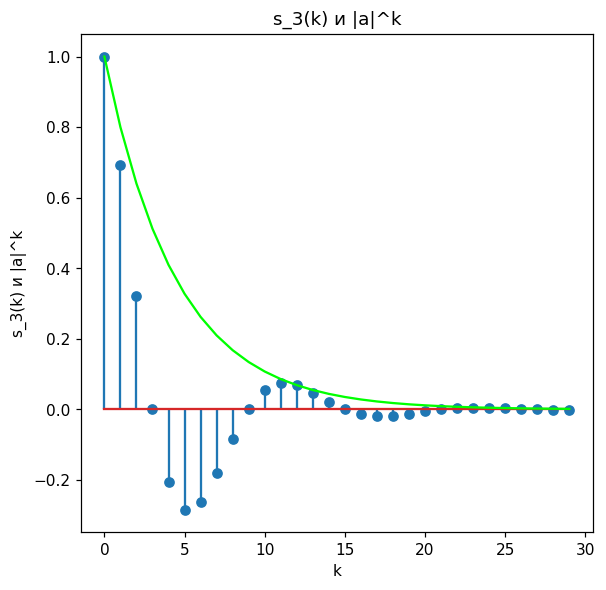

In [67]:
exp = a ** np.arange(0,N-1+1) #экспоненциальная огибающая
s_3 = np.cos(np.arange(0, N-1+1,1)*w0)*C*exp


plt.figure(figsize=(6,6), dpi=110)

plt.stem(np.arange(0,N-1+1),s_3)
plt.plot(np.arange(0,N-1+1), exp, color="#00FF00")
plt.title("s_3(k) и |a|^k")
plt.xlabel("k")
plt.ylabel("s_3(k) и |a|^k")

plt.show()

Аналитическая формула для $s_3(k)$:

$$s_3(k) = a^k \cdot C \cos(\hat{w}_0k)$$

-----------------

#### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

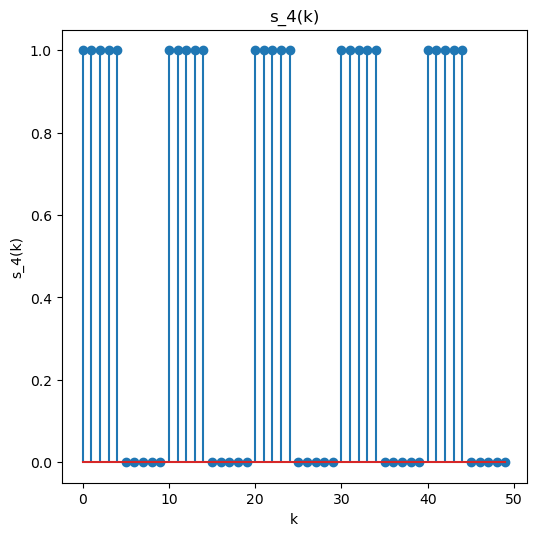

In [63]:
s4 = ([1]*n_imp + [0]*n_imp)*5
arr = np.arange(0,(2*n_imp)*5,1)

plt.figure(figsize=(6,6), dpi=100)

plt.stem(arr, s4)
plt.title("s_4(k)")
plt.xlabel("k")
plt.ylabel("s_4(k)")

plt.show()

Так как $s_4(k)$ является периодической функцией с периодом $2\cdot n_{imp}$, то известно, что $s_4(k) = s_4(k + 2 \cdot n_{imp})$

ИЛИ

Так как $s_4(k) = \sigma_d(k) - \sigma_d(k - n_{imp})$ $k \in [0;2\cdot n_{imp}]$, то 
$$s_4(k) = \sum_{i=0}^{\infty}{\sigma_d(k+2i \cdot n_{imp}) - \sigma_d(k+2i \cdot n_{imp} - (2i+1) \cdot n_{imp})}$$

## Выводы

В ходе практической работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов. Были смоделированы сигналы, представляющие собой сумму функций скачков с различной задержкой, для построения одинарного прямоугольного дискретного сигнала и периодического дискретного прямоугольного сигнала. Смоделирована функция, являющаяся линейной комбинацией различных гармонических дискретных сигналов, для которой были вычислены такие параметры, как: среднее значение дискретного сигнала, энергия дискретного сигнала, средняя мощность дискретного сигнала. Был смоделирован гармонический сигнал, амплитуда которого проходит под экспоненциальной огибающей. Для всех сигналов был построен график.